# Estadística descriptiva para datos de dieta de la codorniz moctezuma

### Importando librerías

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ydata_profiling import ProfileReport

import plotly.express as px
import plotly.graph_objects as go


### Cargando los datos

In [2]:
directorio = '../data'

df = pd.read_excel(os.path.join(directorio,"dieta_oscar_MCD.xlsx"), index_col=0)

df.head()

,edad,sexo,estado,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,...,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap
id,,,,,,,,,,,,,,,,,,,,,
2014-104,J,Female,NM,9.7584,9.7584,0.0,0.000,0.0000,0.0000,0.0,...,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
2014-105,J,Male,NM,3.9632,3.9632,0.0,0.000,0.0000,0.0000,0.0,...,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
2016-133,A,Female,AZ,5.4562,3.8238,0.0,0.000,0.6148,0.0726,0.0,...,10.0,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916,Madrean Encinal
2014-28,J,Female,NM,4.4976,3.7076,0.0,0.000,0.0000,0.0000,0.0,...,8.0,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466,Colorado Plateau Pinyon-Juniper Woodland
2016-132,J,Male,AZ,5.4630,2.2011,0.0,0.778,0.3908,0.0000,0.0,...,8.0,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562,Apacherian-Chihuahuan Mesquite Upland Scrub


### Extrayendo algunas estadísticas básicas descriptivas de los datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 2014-104 to 2015-63
Columns: 145 entries, edad to gap
dtypes: float64(137), int64(4), object(4)
memory usage: 363.9+ KB


##### Analizando las variables categóricas:

In [14]:
df.describe(include=['object'])

,edad,sexo,estado,gap
count,232,277,319,221
unique,2,4,3,14
top,J,Male,AZ,Apacherian-Chihuahuan Piedmont Semi-Desert Gra...
freq,165,171,176,52


##### Analizando las variables numéricas:

In [15]:
pd.set_option('display.max_columns', None) # Para mostrar todas las columnas
df.describe(include=[np.number])

,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,Lotus.wrightii,Cyp.rizo,Commelina.dianthifolia,Kallstroemia.parviflora,Fabacea,Ipomoea,Desmodium,Euphorbia probably E. bilobata,Talinum.aurantiacum,SP17,Heterosperma.pinnatum,SP19,Desmanthus cooleyi,Celtis.reticulata,Panicum.hirticaule,Setaria,Malvacea,Cyperus.fendlerianus,SP26,Setaria.1,SP28,Cryptantha.cinerea,Sphaeralcea.fendleri,Hymenopappus.flavescens,Solaneaceae,Euphorbia,SP34,Piptochaetium.fimbriatum,Acalypha.neomexiacana,Fabaceae,Lupinus.neomexicanus,Mirabilis.longiflora,SP44,Prunus.virginiana,SP46,Urochloa,Cyperaceae,Pinus.edulis,Fabacea.1,SP51,SP52,Calliandra.humilis,Fabaceae.1,Solanum,Calliandra.eriophylla,Desmanthus.cooleyi,Sp59,Croton.pottsii,Lupinus.1,Polygonaceae,Euphorbia.1,Calliandra,Solanum.1,SPA1,SPA2,Lotus,Bidens.leptocephala,SPA5,SPA6,Tephrosia,Asteraceae.Uropappus lindleyi,SPA9,SPA10,Ziziphus.obtisufolia,Aristida,Diodia.teres,Bothriochloa,Pinus.dulis,Paspalum.distichum,SPA17,SPA18,SPA19,Euphorbia.exstipulata,SPA21,Asteracea,SPA23,SPA24,Chilopsis.linearis,Sorghum.halepense,Amaranthus,Setaria nigricans,SPA29,SPA30,SPA31,SPA32,SPA33,SPA34,SPA35,SPA36,SPA37,SPA38,SPA39,SPA40,Agave.or.Yucca,SPA42,SPA43,SPA44,Sida,SPA46,SPA47,Tragia,Lupinus.2,SPA50,SPA51,SPA52,SPA53,SPA54,SPA55,Amaranthus.1,Desmodium.1,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida,Juniperus prob. deppeana,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
count,319.000000,319.000000,318.000000,317.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,318.000000,319.000000,319.000000,319.000000,318.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,319.000000,319.000000,318.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.0,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,3.190000e+02,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.0,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.0,318.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.0,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,317.000000,319.000000,319.000000,318.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,232.000000,190.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,319.000000,220.000000
mean,2.084231,0.097181,0.391575,0.194748,0.319146,0.014456,0.000230,0.113014,0.035234,0.008553,0.000138,0.000005,0.512206,0.035145,0.005528,0.000017,0.010252,0.004383,0.047299,0.000392,0.008701,0.002931,0.001678,0.000765,0.000377,0.005072,0.022155,0.000031,0.019694,0.000059,0.002730,0.000007,0.000012,0.00089,0.000034,0.000002,0.000392,0.000021,0.027008,0.009103,0.000020,0.000110,0.003145,0.000106,0.000108,0.000013,0.039640,0.000679,0.007397,0.000071,0.000007,0.000124,0.003862,0.000055,0.001578,0.000007,0.001058,0.0,0.000105,0.000668,0.000207,0.000453,0.000397,0.001531,0.000388,0.000068,0.000679,0.000069,0.000019,0.000076,0.008066,0.008287,0.002403,0.000731,0.00011,3.134796e-07,0.006287,0.001234,0.000036,0.069161,0.000154,0.000015,0.0,0.000184,0.000082,0.004871,0.000002,0.000032,0.002182,0.000568,0.000008,0.001721,0.001865,0.000005,0.000029,0.0,0.000070,0.000041,0.000009,0.000077,0.000091,0.000005,0.000014,0.000467,0.000790,0.000020

In [16]:
pd.set_option('display.max_columns', None) # Para mostrar todas las columnas
numeric_columns = df.select_dtypes(include=[np.number]).columns
mode_df = df[numeric_columns].mode()
mode_df


,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,Lotus.wrightii,Cyp.rizo,Commelina.dianthifolia,Kallstroemia.parviflora,Fabacea,Ipomoea,Desmodium,Euphorbia probably E. bilobata,Talinum.aurantiacum,SP17,Heterosperma.pinnatum,SP19,Desmanthus cooleyi,Celtis.reticulata,Panicum.hirticaule,Setaria,Malvacea,Cyperus.fendlerianus,SP26,Setaria.1,SP28,Cryptantha.cinerea,Sphaeralcea.fendleri,Hymenopappus.flavescens,Solaneaceae,Euphorbia,SP34,Piptochaetium.fimbriatum,Acalypha.neomexiacana,Fabaceae,Lupinus.neomexicanus,Mirabilis.longiflora,SP44,Prunus.virginiana,SP46,Urochloa,Cyperaceae,Pinus.edulis,Fabacea.1,SP51,SP52,Calliandra.humilis,Fabaceae.1,Solanum,Calliandra.eriophylla,Desmanthus.cooleyi,Sp59,Croton.pottsii,Lupinus.1,Polygonaceae,Euphorbia.1,Calliandra,Solanum.1,SPA1,SPA2,Lotus,Bidens.leptocephala,SPA5,SPA6,Tephrosia,Asteraceae.Uropappus lindleyi,SPA9,SPA10,Ziziphus.obtisufolia,Aristida,Diodia.teres,Bothriochloa,Pinus.dulis,Paspalum.distichum,SPA17,SPA18,SPA19,Euphorbia.exstipulata,SPA21,Asteracea,SPA23,SPA24,Chilopsis.linearis,Sorghum.halepense,Amaranthus,Setaria nigricans,SPA29,SPA30,SPA31,SPA32,SPA33,SPA34,SPA35,SPA36,SPA37,SPA38,SPA39,SPA40,Agave.or.Yucca,SPA42,SPA43,SPA44,Sida,SPA46,SPA47,Tragia,Lupinus.2,SPA50,SPA51,SPA52,SPA53,SPA54,SPA55,Amaranthus.1,Desmodium.1,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida,Juniperus prob. deppeana,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500.0,10.0,99.93,376.0,12.379167,1591.0,31.391325,-110.602862,0.0,0.222691
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600.0,NaN,111.82,NaN,14.354167,2023.0,31.479233,-110.594791,NaN,0.272215
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.92,NaN,15.537500,NaN,31.484718,-110.464206,NaN,1.395863
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272.86,NaN,NaN,NaN,31.513011,-108.940734,NaN,1.434210
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### EDA Automatizado: Generación y visualización de reporte usando YData Profiling.
Se utiliza la herramienta de YData Profiling (antes Pandas Profiling) para ver rápidamente un EDA básico de los datos.

In [5]:
# Se crea el reporte
profile = ProfileReport(df, title="EDA básico de los datos de la dieta de la codorniz moctezuma")

# Se visualiza el reporte
#profile.to_notebook_iframe()

# Se guarda el reporte en archivo HTML
profile.to_file("reporte.html")

Se encontró un registro duplicado:

In [4]:
df[df.duplicated(keep=False)]

,edad,sexo,estado,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,...,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap
id,,,,,,,,,,,,,,,,,,,,,
2014-66,A,Male,NM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,19.25,386.0,11.908333,1869.0,32.872338,-107.683823,0.0,1.057318,Madrean Pinyon-Juniper Woodland
2014-67,A,Male,NM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,19.25,386.0,11.908333,1869.0,32.872338,-107.683823,0.0,1.057318,Madrean Pinyon-Juniper Woodland


In [5]:
# Boxplot de Peso Total del Buche según la Edad y el Sexo
fig1 = px.box(df, x='edad', y='peso total', color='sexo', points='all',
              title='Peso Total del Buche según Edad y Sexo')
fig1.show()

In [6]:
# Scatterplot 3D de Tipo de Vegetación, Temperatura y Altitud
fig2 = px.scatter_3d(df, x='tmedia17', y='altitud', z='gap',
                    color='edad', title='Relación respecto al Tipo de Vegetación, Temperatura y Altitud', hover_data={'gap': True})

fig2.show()

In [7]:
# Histograma de la Distancia al Camino más Cercano
fig3 = px.histogram(df, x='dist camino', color='edad', title='Histograma de Distancia al Camino más Cercano')
fig3.show()

Text(0.5, 1.0, 'Top 10 de alimentos más consumidos')

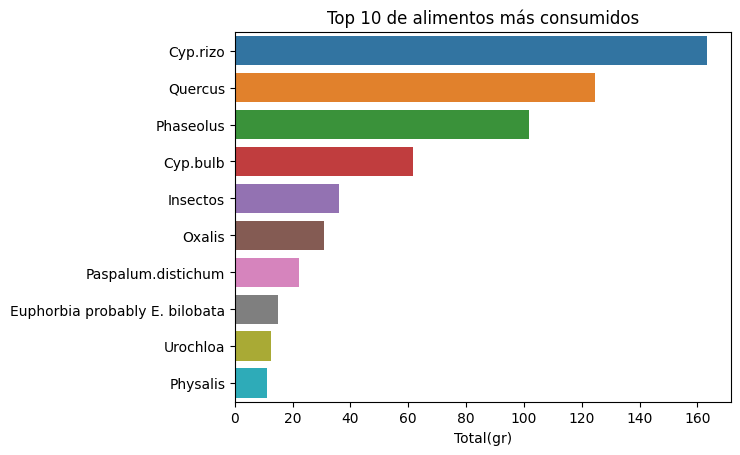

In [5]:
lista_columnas = df.columns[4:134].tolist()

df_sum_alimentos = pd.DataFrame(df[lista_columnas].sum(axis=0).sort_values(ascending=False))
df_sum_alimentos.columns = ['Total(gr)']

top_ten = df_sum_alimentos.head(10)


sns.barplot(
    x=top_ten.iloc[:,0], # Total(gr)
    y=top_ten.index,     # Alimentos
    data=top_ten,)
plt.title('Top 10 de alimentos más consumidos')

Alimentos que no fueron encontrados en ningún buche y por lo tanto son columnas irrelevantes (valor constante 0)

In [93]:
df_sum_alimentos[df_sum_alimentos['Total(gr)'] <= 0]

,Total(gr)
Sida,0.0
SPA19,0.0
Sp59,0.0
SPA32,0.0


Text(0.5, 1.0, 'Relación entre la altitud y el consumo de Cyp.rizo')

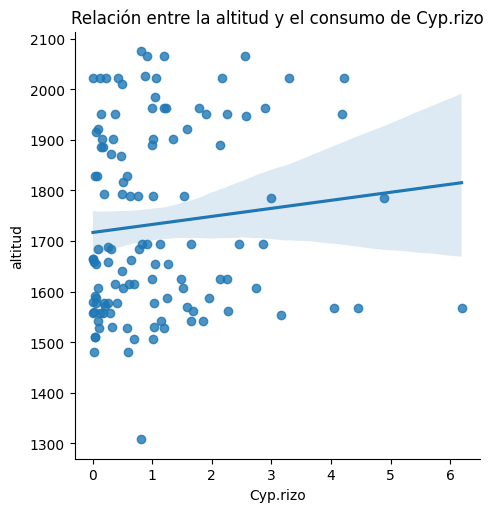

In [6]:
df_cyprizo = df[df['Cyp.rizo'] > 0]
df_cyprizo

sns.lmplot(
    data=df_cyprizo,
    y="altitud", x="Cyp.rizo",
    height=5
)

plt.title('Relación entre la altitud y el consumo de Cyp.rizo') 
